# Imports

In [1]:
import math
import struct
import numpy as np
import matplotlib.pyplot as plt
from binary_fractions import TwosComplement, Binary
import random
import json as j

# This is the normal cordic implementation

In [2]:
angles_degrees = [45.0,        # 0.785398
                  26.56505118, # 0.46364760905065
                  14.03624347, # 0.24497866316245
                  7.125016349, # 0.1243549945481669
                  3.576334375, # 0.062418809995849
                  1.789910608, # 0.031239833425896
                  0.89517371,  # 0.01562372861675
                  0.447614171, # 0.0078123410625155
                  0.2239105,   # 0.003907975454777
                  0.111905677, # 0.0019531225153184
                  0.055952892, # 0.00097656219141037
                  0.027976453, # 0.00048828121787823
                  0.013988227, # 0.00024414061766576
                  0.006994114, # 0.000122070317559528
                  0.003497057, # 6.103515877976e-5
                  0.001748528  # 3.051757066324e-5
                  ]

def cordic_angles(n):
    angles_degrees = []
    for i in range(n):
        angle_deg = math.degrees(math.atan(2**(-i)))
        angles_degrees.append(angle_deg)
    return angles_degrees
angles_degrees = cordic_angles(40)

def scale_input(angle):
    # Ensure angle is within the range [-pi, pi)
    angle = angle % (2 * math.pi)
    # Ensure angle is positive
    if angle < 0:
        angle += 2 * math.pi
    
    # Determine the number of pi/2 rotations needed to bring the angle to the first quadrant
    num_rotations = math.floor(angle / (0.5 * math.pi))
    
    # Compute the scaled angle in the first quadrant
    scaled_angle = angle - num_rotations * (0.5 * math.pi)
    
    # Determine the sign based on the number of rotations
    sign = 1 if num_rotations % 2 == 0 else - 1
    
    return scaled_angle, sign

def CORDIC_TEST(angle_deg):
      
    #a test of cordic
    print(f"actual Value: {math.cos(math.radians(angle_deg))}\n")
    
    angle = math.radians(angle_deg)
    angle, sign = scale_input(angle)
    angles_radians = [math.radians(i) for i in angles_degrees]
    
    z = 0.0                     # angle
    x = 1.0 / 1.646760258121    # x
    y = 0.0                     # y
    #fix 7 iterations
    for i in range(8):
        print(f"z: {math.degrees(z)}, x: {x}, y: {y}")
        if (z < angle):
            print("too small")
            z = z + angles_radians[i]
            x_plus = x - (y * 2 ** (-i))
            y_plus = y + (x * 2 ** (-i))
            
        elif (z > angle):
            print("too big")
            z = z - angles_radians[i]
            x_plus = x + (y * 2 ** (-i))
            y_plus = y - (x * 2 ** (-i))
            
        else:
            print(f"Exact, Predicted Value: z = {math.degrees(z)} with cos(x) = {x}")
            return
        

        x = x_plus
        y = y_plus
        
    print(f"\nPredicted Value: z = {math.degrees(z)} with cos(x) = {x}, with actual value of predicted: {math.cos(z)}")
    print(f"The result will have a sign of: {sign}")
    
    

CORDIC_TEST(65.0)





actual Value: 0.42261826174069944

z: 0.0, x: 0.6072529350089055, y: 0.0
too small
z: 45.0, x: 0.6072529350089055, y: 0.6072529350089055
too small
z: 71.56505117707799, x: 0.30362646750445277, y: 0.9108794025133583
too big
z: 57.52880770915151, x: 0.5313463181327923, y: 0.8349727856372451
too small
z: 64.6538240580533, x: 0.4269747199281367, y: 0.9013910754038441
too small
z: 68.23015843305066, x: 0.3706377777153964, y: 0.9280769953993526
too big
z: 66.44024782480459, x: 0.3996401838216262, y: 0.9164945648457465
too big
z: 65.5450741145935, x: 0.41396041139734097, y: 0.9102501869735337
too big

Predicted Value: z = 65.09745994373296 with cos(x) = 0.4210717409830717, with actual value of predicted: 0.42107602434194846
The result will have a sign of: 1


# Changable Parameters for my Implementation

In [3]:
INT_BITS = 1
FRAC_BITS = 30
NUM_CORDIC_LOOPS = 8



# my new cordic

In [4]:
def float_to_fixed(number, IB=INT_BITS, FB=FRAC_BITS):
    #return int(number * (10 ** FB))
    
    
    #get just upper bits
    upper = str(int(number))
    upper = int(upper[len(upper) - IB:]) if upper[0] != "-" else int("-" + upper[len(upper) - IB:])
    
    
    lower = abs(int((number - int(number)) * (10 ** FRAC_BITS)))
    return int(str(upper) + str(lower))

def fixed_to_float(fixed, IB=INT_BITS, FB=FRAC_BITS):
    
    
    
    return float( str(fixed)[:IB] + "." + str(fixed)[IB:] )
    # Calculate the fractional multiplier
    #multiplier = 1.0 / (2 ** FB)
    
    # Convert the fixed-point number to floating-point by dividing it by the multiplier
    #floating_point = fixed * multiplier
    
    #return floating_point


def my_cordic(target_input, IB=INT_BITS, FB=FRAC_BITS):
    
    angles_radians = [float_to_fixed(math.radians(i)) for i in angles_degrees]
    angle = 0
    x = float_to_fixed(1.0 / 1.646760258121)
    y = 0 
    target = float_to_fixed(math.radians(target_input))

    for i in range(NUM_CORDIC_LOOPS):
        if (target == angle):
            print(f"early termination, {fixed_to_float(x)}")
            return fixed_to_float(x)
        else:
            if (target > angle):
                print(f"larger, target: {target}, angle: {angle}")
                angle = angle + angles_radians[i]
                x_plus = x - (y * 2 ** (-i))
                y_plus = y + (x * 2 ** (-i))
                x = x_plus
                y = y_plus
            else:
                print(f"smaller, target: {target}, angle: {angle}")
                angle = angle + angles_radians[i]
                x_plus = x - (y * 2 ** (-i))
                y_plus = y + (x * 2 ** (-i))
                x = x_plus
                y = y_plus
    
    return fixed_to_float(x)
    
    
#print(math.cos(45))
#print(f"Result: {my_cordic(45)}")

crumbs = 999.23425234121231

crumbs = 45
#print(float_to_fixed(crumbs))
#print(fixed_to_float(float_to_fixed(crumbs)))


# Same thing in binary

I must do the whole thing with strings lol

In [5]:
def binary_to_hex(binary_str):
    # Convert binary string to integer
    decimal_num = int(str(binary_str).replace(".", ""), 2)
    
    # Convert integer to hexadecimal string
    hex_str = hex(decimal_num)
    
    # Remove '0x' prefix from hex string
    hex_str = hex_str[2:]
    
    return hex_str.upper()  # Convert to uppercase for consistency





def binary_to_fixed(binary_number, IB, FB):
    #https://github.com/Jonny-exe/binary-fractions/tree/master/binary_fractions#binary.Binary.to_no_exponent
    #print(binary_number)
    
    if type(binary_number) == str:
        binary_number = Binary(binary_number)
    
    mant, upper, lower, exp = binary_number.components()
    #print(f"upper: {upper[0:IB]}, lower: {lower[:FB]}") # 11001001000011111101101010100010001000010110100011
    return (upper[0:IB] + "." + lower[:FB])

def fixed_to_decimal(number):
    #return (number)
    return TwosComplement(number).to_float()
    return TwosComplement.to_float((number))
    



def bin_cordic(target_decimal, IB=INT_BITS, FB=FRAC_BITS, depth=NUM_CORDIC_LOOPS, mode="debug"):
    
    def cordic_angles(n):
        angles_degrees = []
        for i in range(n):
            angle_deg = math.degrees(math.atan(2**(-i)))
            angles_degrees.append(angle_deg)
        return angles_degrees
    angles_degrees = cordic_angles(40)
    
    
    angles_radians = [(math.radians(i)) for i in angles_degrees] 
    binary_angles_unrounded = [Binary(rad) for rad in angles_radians]
    binary_angles = []
    for angle in binary_angles_unrounded:
        binary_angles.append( binary_to_fixed(angle, IB=IB, FB=FB) )
    
    if target_decimal == 0.0: return 0.0
    if math.degrees(target_decimal) == 45.0: return 0.7071067811865476
    target = binary_to_fixed(Binary(target_decimal), IB=IB, FB=FB)
    test_angle = "0.0" # base 2
    x = binary_to_fixed(Binary(1.0 / 1.646760258121), IB=IB, FB=FB)
    y = "0.0" # base 2

    for i in range(depth):
        if(mode=="debug"): print(f"test_angle: {math.degrees(fixed_to_decimal(test_angle))}, x: {fixed_to_decimal(x)}, y: {fixed_to_decimal(y)}")
        print(binary_to_hex(Binary(test_angle).rfill(IB)))
        print("x")
        print(binary_to_hex(Binary(x).rfill(IB)))
        print("y")
        print(binary_to_hex(Binary(y).rfill(IB)))
        if (i > FB): break
        if (Binary(test_angle) < Binary(target)):
            if(mode=="debug"): print("     too smol")
            test_angle = binary_to_fixed(Binary(Binary(test_angle)) + Binary(binary_angles[i]), IB=IB, FB=FB)
            x_plus = binary_to_fixed( (Binary(x) - Binary( Binary(y) >> i )), IB=IB, FB=FB )
            y_plus = binary_to_fixed( (Binary(y) + Binary( Binary(x) >> i )), IB=IB, FB=FB )
            x = x_plus
            y = y_plus
        elif (Binary(test_angle) > Binary(target)):
            if(mode=="debug"): print("     too big")
            test_angle = binary_to_fixed((Binary(Binary(test_angle)) - Binary(binary_angles[i])), IB=IB, FB=FB)
            x_plus = binary_to_fixed( (Binary(x) + Binary( Binary(y) >> i )), IB=IB, FB=FB )
            y_plus = binary_to_fixed( (Binary(y) - Binary( Binary(x) >> i )), IB=IB, FB=FB )
            x = x_plus
            y = y_plus
            
        else:
            if(mode=="debug"): print("     equal")
            if(mode=="debug"): print("     " + str(fixed_to_decimal(x)))
            break
    if(mode=="debug" or mode=="output"): print(f"\n\nThe value for your angle is: {math.cos(fixed_to_decimal(test_angle))}")
    if(mode=="debug" or mode=="output"): print(f"The correct solution is:     {math.cos(target_decimal)} ({(fixed_to_decimal(x)) - math.cos(target_decimal)})")
    if(mode=="debug" or mode=="output"): print(      f"Final Answer:                {(fixed_to_decimal(x))} ({(fixed_to_decimal(x)) - math.cos(fixed_to_decimal(test_angle))})")
    if mode=="return": return x
    if mode=="relative_error": return (fixed_to_decimal(x)) - math.cos(fixed_to_decimal(test_angle))
    if mode=="return_actual_error": return (fixed_to_decimal(x)) - math.cos(target_decimal)


INT_BITS = 2
FRAC_BITS = 20
NUM_CORDIC_LOOPS = 16

bin_cordic(-0.07, IB=INT_BITS, FB=FRAC_BITS, depth=NUM_CORDIC_LOOPS,)
#print(binary_to_fixed(Binary(-123.2)))


test_angle: 0.0, x: 0.6072521209716797, y: 0.0
0
x
4DBA7
y
0
     too smol
test_angle: 44.99996368619865, x: 0.6072521209716797, y: 0.6072521209716797
C90FD
x
4DBA7
y
4DBA7
     too big
test_angle: 18.434953777431215, x: 0.9108781814575195, y: 0.30362606048583984
14979
x
E92F5
y
4DBA7
     too big
test_angle: 4.398751108514932, x: 0.9867839813232422, y: 0.07590579986572266
9D3B
x
7E4EF
y
136E9
     too big
test_angle: 2.7262290260755693, x: 0.996272087097168, y: 0.04744148254394531
C2E5
x
FF0BB
y
6129
     too smol
test_angle: 6.302516075494246, x: 0.9933061599731445, y: 0.10970783233642578
1C28F
x
FE495
y
1C15D
     too big
test_angle: 4.512624022357384, x: 0.9967336654663086, y: 0.07866668701171875
A14D
x
FF29F
y
2847
     too big
test_angle: 3.6174867504921933, x: 0.9979619979858398, y: 0.06309223175048828
40A7
x
FF7A7
y
1026D
     too smol
test_angle: 4.065055386424789, x: 0.9974689483642578, y: 0.07088851928710938
1229B
x
7FAD1
y
4897
     too big
test_angle: 3.8412983892151713, x

# Iterating

In [6]:
def accuracy_testbench(model, min_bits=8, max_bits=40, min_depth=8, max_depth=20, num_trials = 50):
    
    experiments = []
    if 1:
        for dep in range(min_depth, max_depth):
        #for dep in range(min_depth, 10):
            print(f"depth: {dep}")
            for bitz in range(min_bits, max_bits):
                #def bin_cordic(target_decimal, IB=INT_BITS, FB=FRAC_BITS, mode="debug"):
                ave = 0
                test = []
                for i in range(num_trials):
                    random_number = random.uniform(0, 1)
                    sample = float(model((random_number), FB=bitz, depth=dep, mode="return_actual_error"))
                    ave += sample
                    test.append(sample)
                    
                #print(f"for {bitz} fractional bits, the error is: {ave/num_trials}")
                experiments.append({"depth": dep, "bits": bitz, "error": ave/num_trials, "trials": test})

    
    
    def write_list_to_json(data_list, file_path):
        with open(file_path, 'w') as json_file:
            j.dump(data_list, json_file)


    file_path = 'data.json'  # Path to the JSON file
    write_list_to_json(experiments, file_path)

#accuracy_testbench(bin_cordic)
    

# plot dat shiz

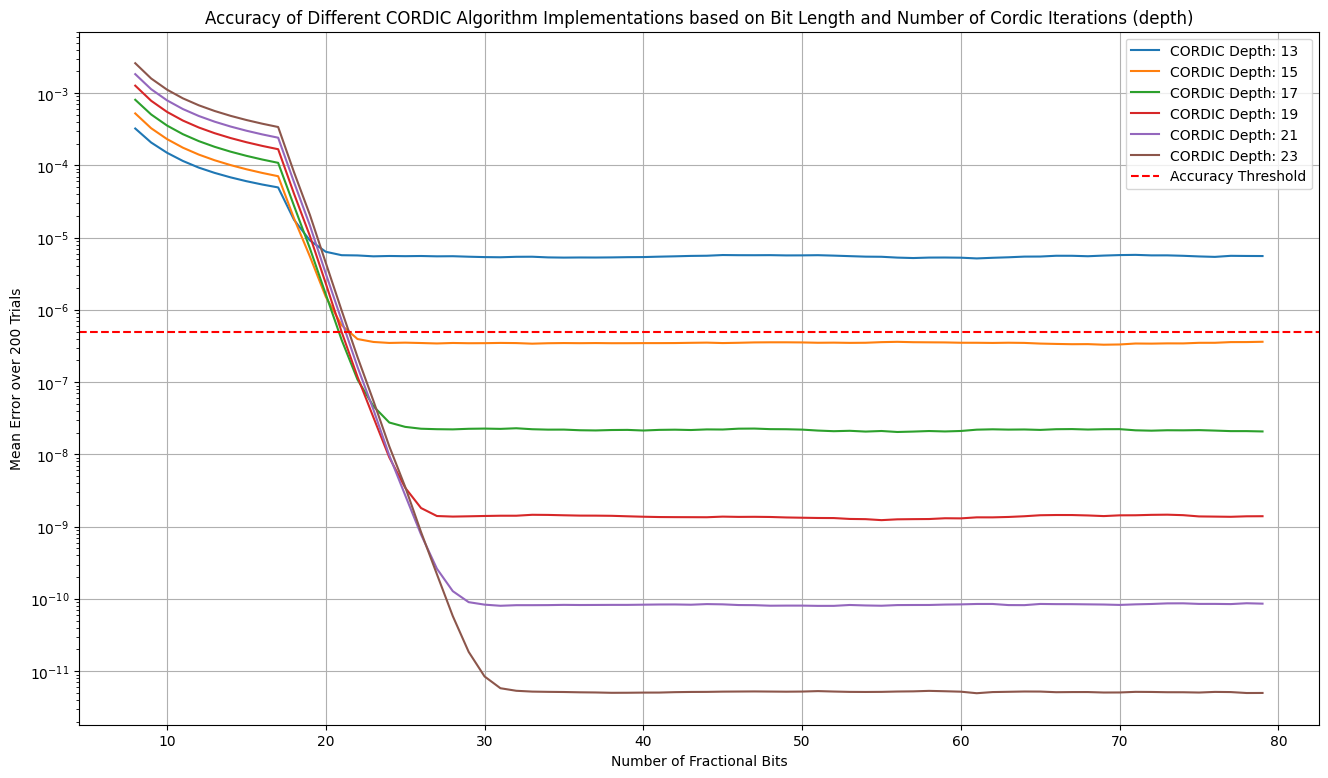

In [26]:
def plot_line_graph(data, xlabel="Number of Fractional Bits", ylabel="Mean Error over 200 Trials", title="Line Graph"):

    if(1):
        def moving_average_filter(data, n):
            filtered_data = []
            for i in range(len(data)):
                if i < n - 1:
                    # For the first few elements where we don't have enough history
                    filtered_data.append(sum(data[:i+1]) / (i + 1))
                else:
                    # For the rest of the elements
                    filtered_data.append(sum(data[i-n+1:i+1]) / n)
            return filtered_data
    else:
        def moving_average_filter(data, n):
            out = []
            shift = [data[0] for n in range(n)]
            for i in range(len(data)):
                for shiftIndex in range(1, len(shift)):
                    print(shiftIndex)
                    shift[shiftIndex - 1] = shift[shiftIndex]
                
                shift[-1] = shift[i + 1] 
                
                
                out.append(sum(shift) / len(shift))
                

                
            return out
    
    plt.figure(figsize=(16, 9))  # Set the figure size (optional)

    #for error in errors:
    #   print(error)
    
    for depth in range(8, 20, 2):
        bits = []
        errors = []
        for data in source_data:
            if data["depth"] == depth:
                bits.append(data["bits"])
                trials = data["trials"]
                new_thing = 0
                for trial in trials:
                    #new_thing += trial
                    new_thing += trial ** 2
                errors.append(abs(new_thing / len(trials)))    
        x_values = bits
        y_values = errors
        plt.plot(x_values, moving_average_filter(y_values, 10), label=f"CORDIC Depth: {depth + 5}")  # Plot the line graph
        
        mean = np.mean(errors)
        std = np.std(errors)

    plt.title("Accuracy of Different CORDIC Algorithm Implementations based on Bit Length and Number of Cordic Iterations (depth)")
    plt.xlabel(xlabel)  # Set the label for the x-axis
    plt.ylabel(ylabel)  # Set the label for the y-axis
    plt.yscale("log", base=10)
    plt.axhline(y=0.5e-6, color='r', linestyle='--', label='Accuracy Threshold')
    plt.grid(True)  # Enable grid (optional)
    
    if(0):
        # Fit a third-degree polynomial to the data
        coefficients = np.polyfit(x_values, y_values)
        p = np.poly1d(coefficients)

        # Generate points for the trendline
        xrange = np.linspace(min(x_values), max(x_values), 100)
        yrange = p(xrange)

        # Plot the trendline
        plt.plot(xrange, yrange, color='red', label='Trendline')
        
    
    plt.legend()  # Add legend
    plt.show()  # Display the plot
    

source = "./all_data.json"
file = open(source, "r")
source_data=j.load(file)
file.close() 
plot_line_graph(source_data)

## Details

In [15]:
NUM_BITS = 22
DEPTH = 16

angles_radians = [(math.radians(i)) for i in angles_degrees] 
binary_angles_unrounded = [Binary(rad) for rad in angles_radians]
binary_angles = []
for index in range(DEPTH):
    binary_angles.append( binary_to_fixed(binary_angles_unrounded[index], IB=1, FB=NUM_BITS - 1) )

for a in binary_angles:
    print(a)
    
def write_to_mem_file(filename, values,numBits=NUM_BITS):
    with open(filename, 'w') as f:
        for i, val in enumerate(values):

            #f.write(f'4\'b{bin(i)[2:].zfill(4)} <= 32\'b{binary_val};\n')
            f.write(f'CORDIC_shifts[4\'b{bin(i)[2:].zfill(4)}] <= {numBits}\'b{val.replace(".", "")};\n')



print("\n\n")
print(f'{binary_to_fixed(Binary(1.0 / 1.646760258121), IB=5, FB=20)}')

#make_cordic_iters(FLOAT_BITS, UPPER_BITS, LOWER_BITS)
write_to_mem_file("CORDIC_shifts_radians.mem", binary_angles)

# PYTHON:
# 0.110010010000111111011
# 0.011101101011000110011
# 0.001111101011011011101
# 0.000111111101010110111
# 0.000011111111101010101
# 0.000001111111111101010
# 0.000000111111111111101
# 0.000000011111111111111
# 0.000000001111111111111
# 0.000000000111111111111
# 0.000000000011111111111
# 0.000000000001111111111
# 0.000000000000111111111
# 0.000000000000011111111
# 0.000000000000001111111
# 0.000000000000000111111

# 0.000000011111111111111
# 0.000000100000000000000

# MATLAB:
# 0.110010010000111111011
# 0.011101101011000110100
# 0.001111101011011011101
# 0.000111111101010110111
# 0.000011111111101010110
# 0.000001111111111101011
# 0.000000111111111111101
# 0.000000100000000000000
# 0.000000010000000000000
# 0.000000001000000000000
# 0.000000000100000000000
# 0.000000000010000000000
# 0.000000000001000000000
# 0.000000000000100000000
# 0.000000000000010000000
# 0.000000000000001000000
# 0.000000000000000100000
# 0.000000000000000010000
# 0.000000000000000001000
# 0.000000000000000000100
# 0.000000000000000000010

0.110010010000111111011
0.011101101011000110011
0.001111101011011011101
0.000111111101010110111
0.000011111111101010101
0.000001111111111101010
0.000000111111111111101
0.000000011111111111111
0.000000001111111111111
0.000000000111111111111
0.000000000011111111111
0.000000000001111111111
0.000000000000111111111
0.000000000000011111111
0.000000000000001111111
0.000000000000000111111



0.10011011011101001110
